<a href="https://colab.research.google.com/github/Thando367/Prediction-of-Product-Sales/blob/main/Project_1_Part_3_(Core)_Thandolwethu_Siloyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Loading Data

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required packages
import pandas as pd

# file path
df_filepath = "/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"


In [ ]:
# reding sales_prediction 2023 data
df_sales_pred = pd.read_csv(df_filepath)
df_sales_pred

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# displaying info for dataframe
df_sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_sales_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<h1>Data Cleaning

In [ ]:
#checking number of rows and columns
df_sales_pred.shape

(8523, 12)

In [ ]:
#checking the datatypes
df_sales_pred.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# total number of duplicated data
tot_num_dupl = df_sales_pred.duplicated().sum()
tot_num_dupl

0

In [ ]:
# identify the missing values
df_sales_pred.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# identifying the percentage of missing data
df_sales_pred.isna().sum() / len(df_sales_pred)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
missing_value = df_sales_pred.isnull().sum()
missing_value

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# identifying the string columns
string_columns = df_sales_pred.select_dtypes('object').columns
string_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
stats = df_sales_pred.describe()
stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800





<h1>**Project 1 - Part 3 (Core)**




In [ ]:
df_sales_pred

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
#checking the number of numerical columns
numerical_columns = df_sales_pred.select_dtypes(include='number').columns
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
## import the required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h5> Displaying Numerical Values

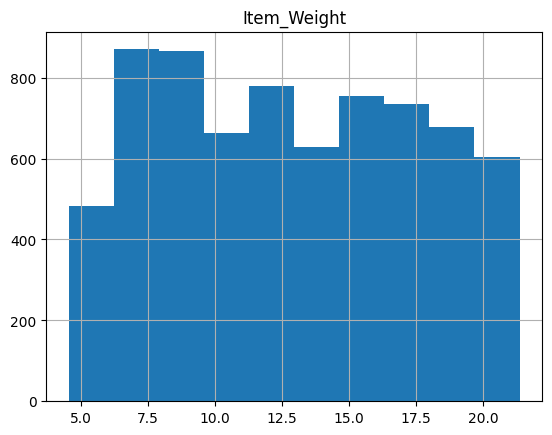

In [ ]:
# displaying histogram for Item_Weight
df_sales_pred.hist(column='Item_Weight');

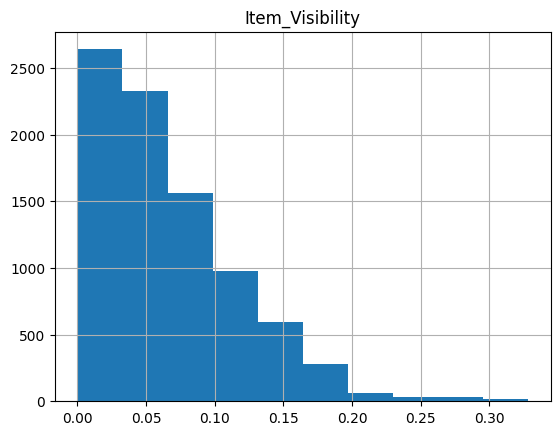

In [ ]:
# displaying histogram for Item_Visibility
df_sales_pred.hist(column='Item_Visibility');


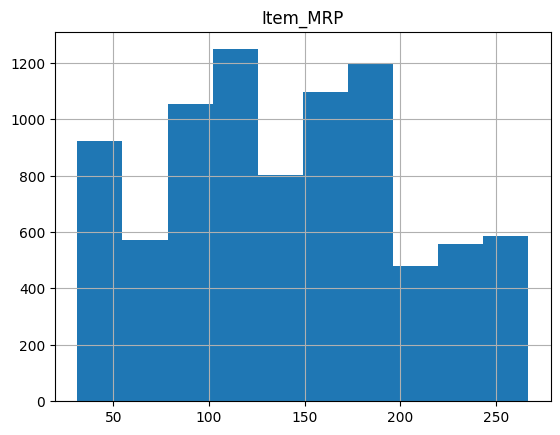

In [ ]:
# displaying histogram for Item_MRP
df_sales_pred.hist(column='Item_MRP');

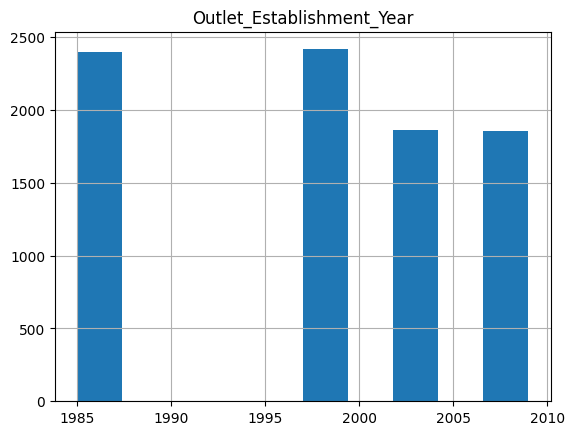

In [ ]:
# displaying histogram for Outlet_Establishment_Year
df_sales_pred.hist(column='Outlet_Establishment_Year');

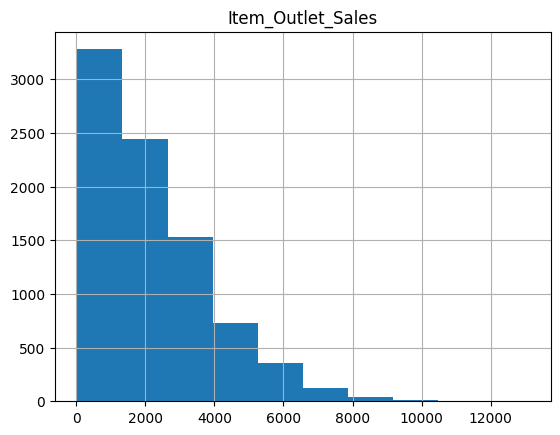

In [ ]:
# displaying histogram for Item_Outlet_Sales
df_sales_pred.hist(column='Item_Outlet_Sales');

<h5>Boxplot for Numericals

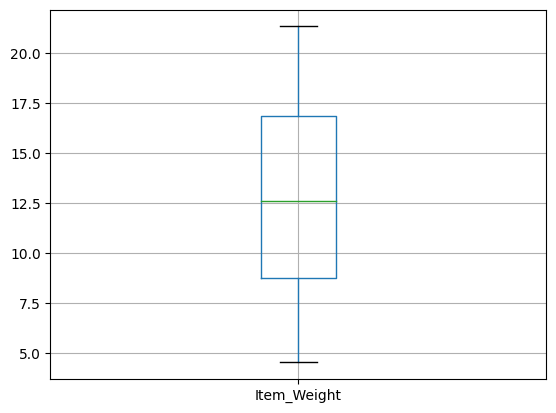

In [ ]:
#Plotting Item_Weight
ax = df_sales_pred.boxplot(column ="Item_Weight")

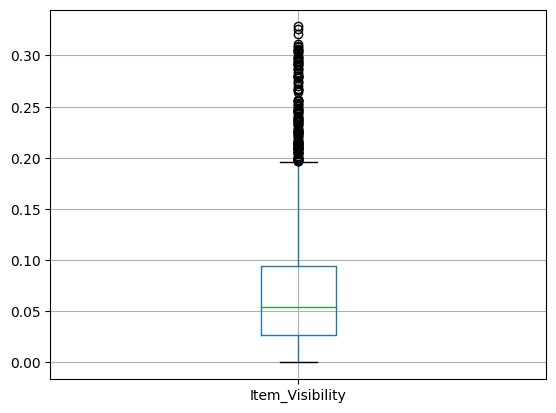

In [ ]:
#Plotting Item_Visibility
ax = df_sales_pred.boxplot(column ="Item_Visibility")

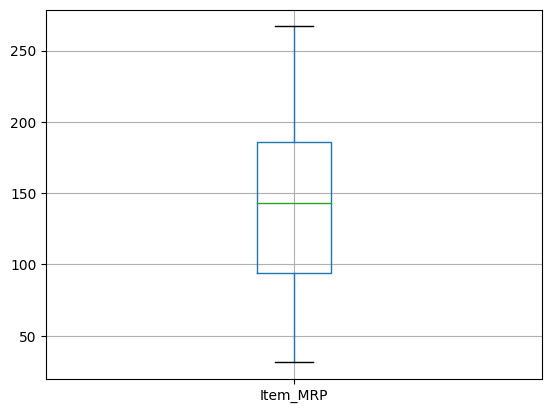

In [ ]:
#Plotting Item_MRP
ax = df_sales_pred.boxplot(column ="Item_MRP")

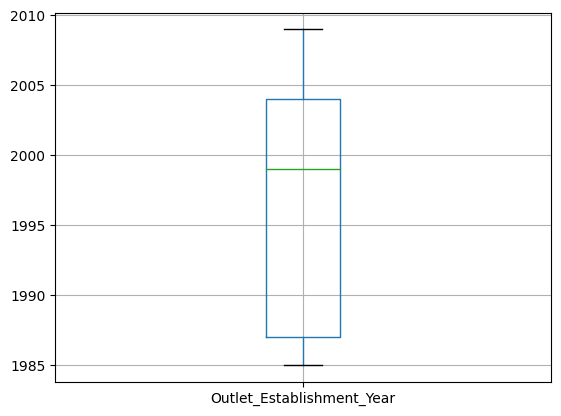

In [ ]:
#Plotting Outlet_Establishment_Year
ax = df_sales_pred.boxplot(column ="Outlet_Establishment_Year")

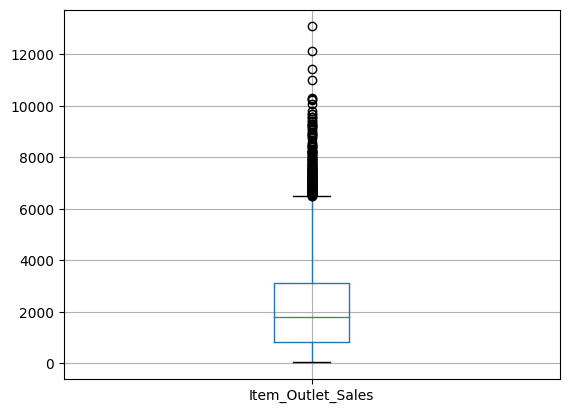

In [ ]:
#Plotting Outlet_Location_Type
ax = df_sales_pred.boxplot(column ="Item_Outlet_Sales")

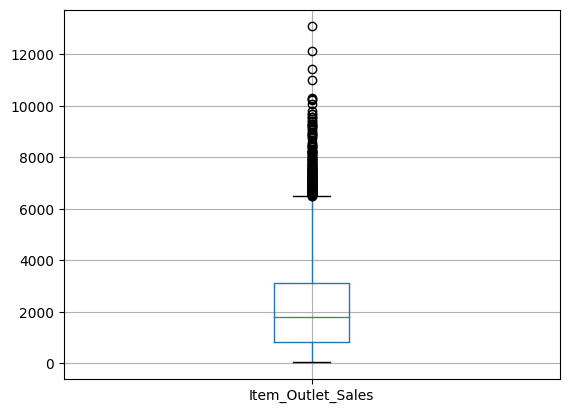

In [ ]:
#Plotting Outlet_Location_Type
ax = df_sales_pred.boxplot(column ="Item_Outlet_Sales")

<h5> Strings Only

This graph shows that there are over 250 senior level executives while there are less than 25 expert level executives.
Strategy #1: To deal with the missing values, we could simply drop the missing values.
Strategy #2: To deal with the missing values, we could fill them in with the most frequent for this feature.
Strategy #3: To deal with the missing values, we could fill them in with the word Unknown for this feature.
We will select Strategy #3 to fill in the missing values with the word Unknown so that the values will be filled in, but we will still be aware that those values are unknown.
Filling in the experience_level column with the word Unknown.



In [ ]:
string_columns = df_sales_pred.select_dtypes('object').columns
string_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

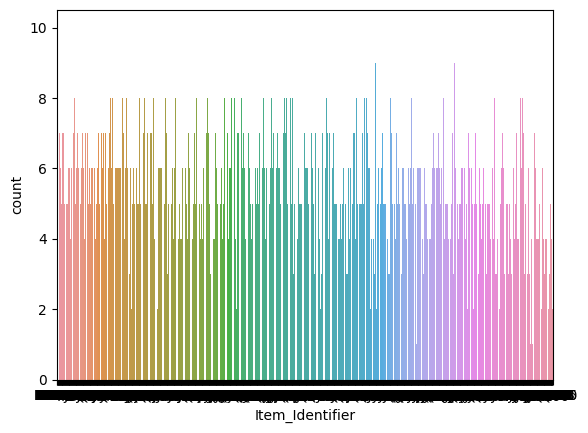

In [ ]:
ax = sns.countplot(data = df_sales_pred, x = 'Item_Identifier'); # The value are not stagnant they increase and decrease overtime

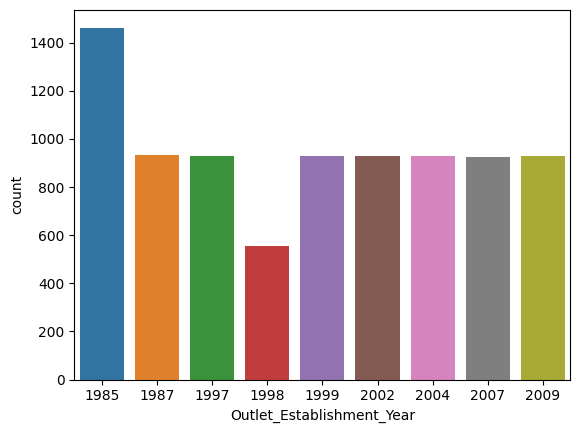

In [ ]:
ax = sns.countplot(data = df_sales_pred, x = 'Outlet_Establishment_Year'); # The outlet establishment year for 1985 had a high values.
#for all the other years except 1998 the values were almost the same.

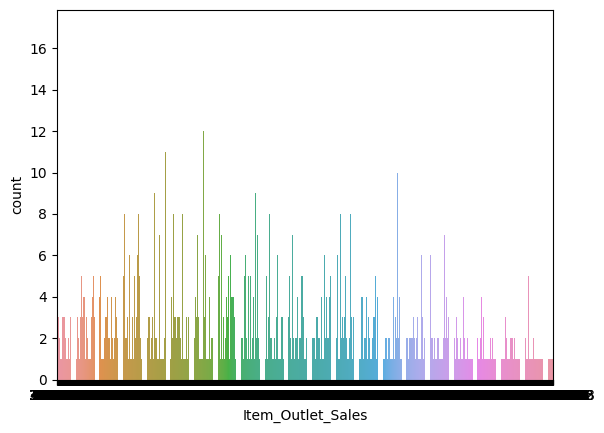

In [ ]:
ax = sns.countplot(data = df_sales_pred, x = 'Item_Outlet_Sales'); # The Item sales increased an decreased over time

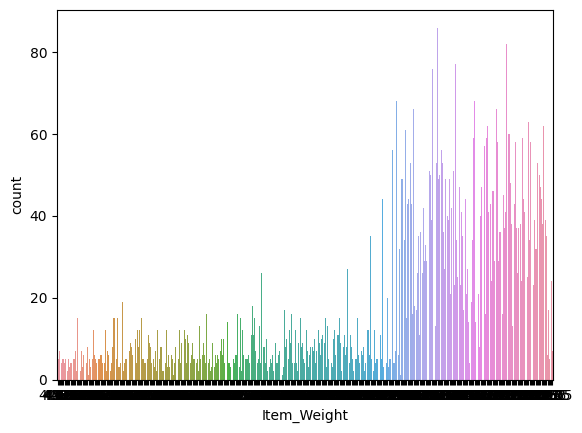

In [ ]:
ax = sns.countplot(data = df_sales_pred, x = 'Item_Weight'); # item weight increase over time

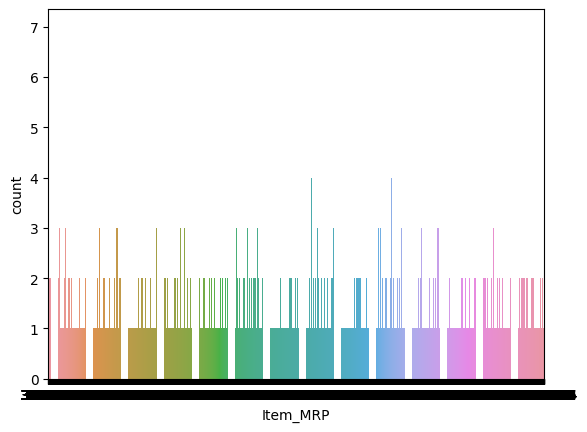

In [ ]:
ax = sns.countplot(data = df_sales_pred, x = 'Item_MRP'); # displaying Item_MRP. Values are not increasing fast

In [ ]:
# Getting correlations
corr = df_sales_pred.corr(numeric_only=True)
corr.round = (.2)


<Axes: >

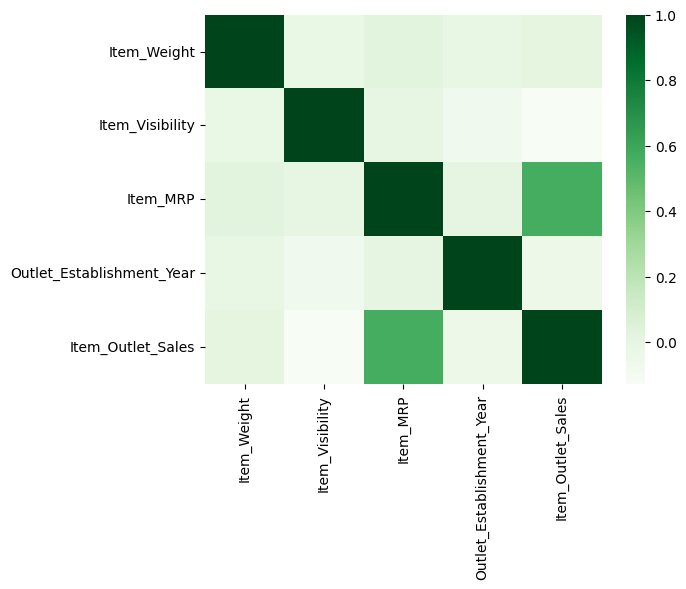

In [ ]:
# Making a heatmap of correlations
sns.heatmap(corr, cmap='Greens')

#Each variable is perfectly correlated with itself

